# CryptOR

<b><i style="font-size:13px">Tags: </i></b><i style="font-size:11px">Funciones a trozos</i>

## Enunciado
CryptOR is una compañía que se dedica a minar criptomonedas. El mayor problema de planeación para CryptOR es la compra de energía. Dado el alto consumo de energía, CryptOR debe negociar contratos para los próximos 12 meses con las diferentes empresas de generación eléctrica. El costo por kilovatio-hora (kWh) varía según la cantidad de energía contratada y la empresa generadora. El costo total en función del consumo está representado por funciones no lineales suministradas por cada generadora. Así mismo, cada empresa generadora establece la duración de cada contrato que se firme con la misma y el consumo máximo mensual que pueden suministrar. Los contratos de cada generadora se pueden renovar múltiples veces durante los 12 meses de planeación, pero estos no se deben traslapar. Finalmente, se conoce un pronóstico de la demanda de energía en kWh que se debe satisfacer sin holgura. Las Tablas 1 y 2 resumen toda la información disponible. 

### Tabla 1. Términos de los contratos para cada generadora.

|                     |**Función de costo ($k)**                      | **Duración del contrato**| **Consumo máximo mensual**|
|:-------------------:|:----------------------------------------:|:------------------------:|:-------------------------:|
|**Generadora Carbón**|$f_1(x) = 0.0012 x^2$                     | 2 meses                  | 250 kWh                   |
|**Generadora Solar** |$f_2(x) = \begin{cases}0.0028 x^2 - 0.5x + 35 \ \ x>0 \\ 0 \ \ x=0 \end{cases}$          | 4 meses                  | 250 kWh                   |
|**Generadora Eólica**|$f_3(x) = \begin{cases}0.5 x log(\frac{x}{150}) + 30 \ \ x>0 \\ 0 \ \ x=0 \end{cases}$  | 3 meses                  | 250 kWh                   |

### Tabla 2. Demanda mensual en kWh.
|Mes| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|demanda| 100| 150| 300| 300| 300| 500| 400| 400| 200| 200| 200| 200|

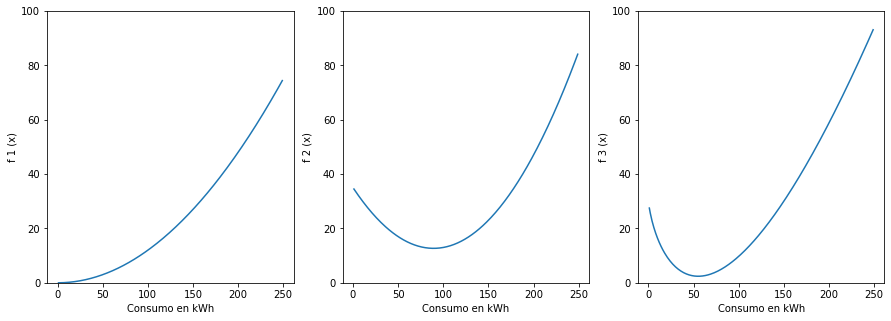

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    # Función de costo de la generadora carbón
    return 0.0012 * (x ** 2)
def f2(x):
    # Función de costo de la generadora solar
    return 0.0028 * x ** 2 - 0.5*x + 35
def f3(x):
    # Función de costo de la generadora eólica
    return 0.5 * x*np.log(x/150) + 30

# Puntos de evaluación de la función
kwh = np.arange(1,250)

fig, axs = plt.subplots(1,3, sharey=False, sharex=True, figsize=(15,5))
axs[0].plot(kwh, f1(kwh))
axs[1].plot(kwh, f2(kwh))
axs[2].plot(kwh, f3(kwh))
for ax_ix, ax in enumerate(axs):
    ax.set_xlabel("Consumo en kWh")
    ax.set_ylabel(f"f {ax_ix+1} (x)")
    ax.set_ylim([0,100])



## Linealización a trozos

Optimizar utilizando las funciones $f_1(x)$, $f_2(x)$ y $f_3(x)$ es computacionalmente más difícil debido a que son funciones no lineales. Sin embrago, dado que son funciones [convexas](https://es.wikipedia.org/wiki/Funci%C3%B3n_convexa) es posible aproximarlas con múltiples funciones lineales. Dada una función convexa $f(x)$, la función $g(x;x_0) = f(x_0) + f'(x_0) * (x-x0)$ es una aproximación de [primer orden](https://es.wikipedia.org/wiki/Serie_de_Taylor), la cual es exacta en $x_0$ y se degrada a medida que $x$ se aleja de $x_0$. Con esta idea en mente, cualquier función convexa se puede aproximar generando múltiples funciones de forma  $g(x;x_0)$ para diferentes valores de $x_0$. La siguiente celda muestra la función $f(x) = (x - 4)^2$ (en azul) y su aproximación (en rojo) utilizando 4 rectas correspondientes a  $g(x;x_0)$ para $x_0=0,3,5,8$.

Función evaluada en 0:  16.0 + -8.0 * (x - 0)
Función evaluada en 3:  1.0 + -2.0 * (x - 3)
Función evaluada en 5:  1.0 + 2.0 * (x - 5)
Función evaluada en 8:  16.0 + 8.0 * (x - 8)


(-2.0, 40.0)

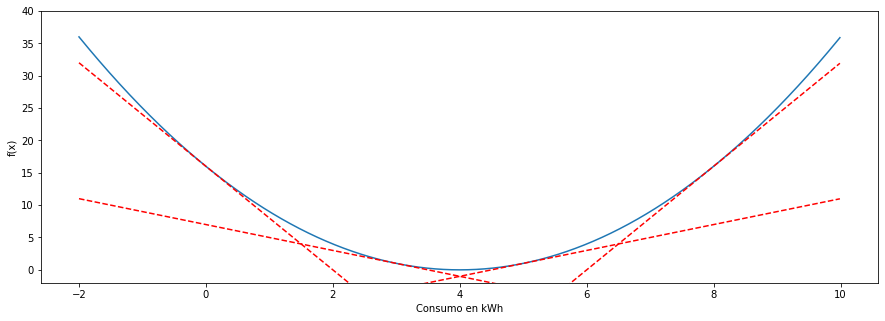

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, orden=0):
    if orden == 0:
        # Función (x-4) ^ 2
        return  (x-4) ** 2 
    else:
        # Derivada evaluada en x
        return 2 *(x - 4)

# Puntos de evaluacion de la función
dominio = np.arange(-2,10,0.01)

fig, axs = plt.subplots(1,1, sharey=False, sharex=True, figsize=(15,5))
axs.plot(dominio, f(dominio))
for x_0 in [0, 3, 5, 8]:
    axs.plot(dominio, f(x_0) +  f(x_0,1) * (dominio - x_0), linestyle='dashed', color='red')
    print(f'Función evaluada en {x_0}:  {f(x_0):.1f} + {f(x_0, 1):.1f} * (x - {x_0})')
axs.set_xlabel("Consumo en kWh")
axs.set_ylabel(f"f(x)")
axs.set_ylim([-2,40])


### Optimizando con la aproximación
Para una función convexa, $f(x)$, los siguientes problemas son equivalentes:
 $$
\begin{align*}
\min & f(x)      &= \ \ \min \ \ &z  \\ 
&x\in \mathbb{R}. &        & z \geq f(x), \\
&                &        & x \in \mathbb{R}.
\end{align*}
$$
Asi mismo, $f(x)\geq g(x,x_0)$ para cualquier valor de $x_0$. 

Con estas dos observaciones, el problema original, $\min_{x\in\mathbb{R}} (x-4)^2$, lo podemos aproximar con el siguiente modelo:
 $$
\begin{align*}
\min \ \ &z  \\ 
       & z \geq 16  -8 * (x - 0) \\
       & z \geq 1  -2 * (x - 3) \\
       & z \geq 1 + 2 * (x - 5) \\
       & z \geq 16 + 8 * (x - 8) \\
      & x \in \mathbb{R} 
\end{align*}
$$


### Funciones de costo aproximadas
Volviendo al problema de cryptOR, una posible aproximación se muestra a continuación. 

Función 1 evaluada en 20:  0.480 + 0.048 * (x - 20)
Función 1 evaluada en 50:  3.000 + 0.120 * (x - 50)
Función 1 evaluada en 100:  12.000 + 0.240 * (x - 100)
Función 1 evaluada en 200:  48.000 + 0.480 * (x - 200)
Función 2 evaluada en 20:  26.120 + -0.388 * (x - 20)
Función 2 evaluada en 50:  17.000 + -0.220 * (x - 50)
Función 2 evaluada en 100:  13.000 + 0.060 * (x - 100)
Función 2 evaluada en 200:  47.000 + 0.620 * (x - 200)
Función 3 evaluada en 20:  9.851 + -0.507 * (x - 20)
Función 3 evaluada en 50:  2.535 + -0.049 * (x - 50)
Función 3 evaluada en 100:  9.727 + 0.297 * (x - 100)
Función 3 evaluada en 200:  58.768 + 0.644 * (x - 200)


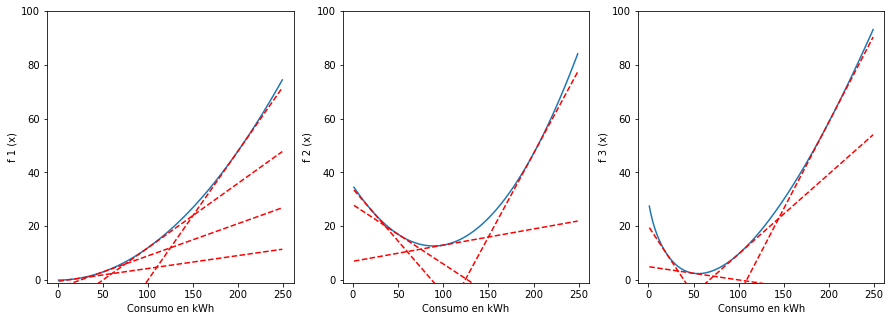

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x, orden=0):
    if orden == 0:
        # Función de costo de la generadora carbón
        return 0.0012 * (x ** 2) 
    else:
        # Derivada evaluada en x
        return 0.0012 * 2 * x

def f2(x, orden=0):
    if orden == 0:
        # Función de costo de la generadora solar
        return 0.0028 * x ** 2 - 0.5*x + 35
    else:
        # Derivada evaluada en x
        return 2 * 0.0028 * x - 0.5
def f3(x, orden=0):
    if orden == 0:
        # Función de costo de la generadora eólica
        return 0.5 * x*np.log(x/150) + 30
    else:
        # Derivada evaluada en x
        return 0.5 * np.log(x/150) + 0.5

# Funciones de costo
f = [f1,f2,f3]
# Puntos de evaluación de la función
kwh = np.arange(1,250)

fig, axs = plt.subplots(1,3, sharey=False, sharex=True, figsize=(15,5))
for i, ax in enumerate(axs):
    axs[i].plot(kwh, f[i](kwh), )
    for x_0 in [20, 50, 100, 200]:
        axs[i].plot(kwh, f[i](x_0) +  f[i](x_0,1) * (kwh - x_0), linestyle='dashed', color='red')
        print(f'Función {i+1} evaluada en {x_0}:  {f[i](x_0):.3f} + {f[i](x_0, 1):.3f} * (x - {x_0})')
    ax.set_xlabel("Consumo en kWh")
    ax.set_ylabel(f"f {i+1} (x)")
    ax.set_ylim([-1,100])


Formule un modelo general de optimización lineal que le permita a CryptOR satisfacer la demanda de energía al mínimo costo y satisfaciendo las condiciones de los contratos. Para esto usted debe seguir los siguientes pasos: 

## Formulación

**1.** Escriba lo(s) conjunto(s), parámetro(s) y variable(s) de decisión que utilizará en el modelo.  

### Restricciones
**2.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que se debe respetar la demanda exacta en cada mes. 


**3.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que la cantidad de kWh contratados no superan el consumo máximo mensual en los meses en donde hay un contrato vigente.

**4.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que si un contrato se firma, debe estar vigente por la duración estipulada, y que solo se puede haber un contrato vigente si se firmó previamente o en el mismo mes.

**4.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que los contratos con cada generadora no se deben traslapar.

**4.** Escriba la(s) restricción(es) lineal(es) que modelan las funciones de costo con expresiones lineales. Note que si no hay un contrato vigente en un mes particular, el costo es cero.

**4.** Escriba la(s) restricción(es) que describe(n) matemáticamente el tipo de variable(s) que está utilizando dentro del modelo. 

### Función Objetivo
**5.** Escriba la función objetivo.

## Formulación matemática completa

## Implementación
**6.** Resuelva el modelo planteado utilizando la librería de PulP en Python. ¿Cuál es la solución
óptima del problema? 

In [20]:
#TODO: Implementación del modelo

## Créditos
Instancia: Daniel Duque<br>
Fecha: 21/12/2021